In [1]:
import pandas as pd

In [15]:
# https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?select=diabetes.csv
# https://www.datacamp.com/tutorial/understanding-logistic-regression-python?utm_source=google&utm_medium=paid_search&utm_campaignid=19589720818&utm_adgroupid=143216588777&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=652967469589&utm_targetid=aud-299261629574:dsa-1947282172981&utm_loc_interest_ms=&utm_loc_physical_ms=9043673&utm_content=dsa~page~community-tuto&utm_campaign=230119_1-sea~dsa~tutorials_2-b2c_3-n-eu_4-prc_5-na_6-na_7-le_8-pdsh-go_9-na_10-na_11-na&gclid=CjwKCAjwpuajBhBpEiwA_ZtfhcU0CIv3sy3g9O3Exj-isM1BBXK1KhsCMwYSDzk3--wiZF656oXPIhoCYjYQAvD_BwE

In [3]:
pima = pd.read_csv("diabetes.csv")
pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima.columns = col_names
pima.columns

Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age', 'label'],
      dtype='object')

In [5]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'glucose','bp', 'insulin', 'bmi','pedigree', 'age']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [7]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

The error message you received, "ValueError: Expected 2D array, got 1D array instead," typically occurs when the input data for scaling or other operations is not in the expected format.

To resolve this issue, you can reshape your data using the reshape() function in NumPy. The reshaping depends on whether your data has a single feature or a single sample:

If your data has a single feature (1D array): Use array.reshape(-1, 1) to convert it into a 2D array with one column.

Example:

import numpy as np
scaled_data = data.reshape(-1, 1)

If your data contains a single sample (1D array): Use array.reshape(1, -1) to convert it into a 2D array with one row.

Example:

import numpy as np
scaled_data = data.reshape(1, -1)

By reshaping your data to the appropriate 2D format, you should be able to apply scaling or other operations without encountering the "ValueError" related to the expected array shape.

In [8]:
# from sklearn.preprocessing import MinMaxScaler

# xscaler = MinMaxScaler()
# yscaler = MinMaxScaler()
# X_train_scaled = xscaler.fit_transform(X_train)
# y_train_scaled = yscaler.fit_transform(y_train.values.reshape(-1, 1))

In [9]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16, solver='newton-cg')

## ConvergenceWarning: lbfgs failed to converge (status=1): Then try other types of solver
# By default, solver = 'lbfgs'
# - liblinear
# - newton-cg
# - sag
# - saga
## Different solver methods return different outcomes


# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [10]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[115,  10],
       [ 25,  42]], dtype=int64)

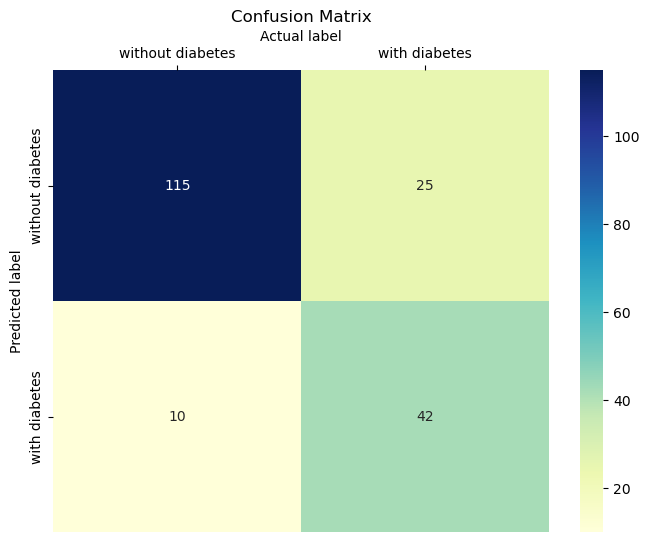

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define the actual and predicted labels
target_names = ['without diabetes', 'with diabetes']
actual_labels = target_names # ["0", "1"]
predicted_labels = target_names # ["0", "1"]

# Define the confusion matrix values
confusion_matrix_values = np.array([[115, 10],
                                   [25, 42]])

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create the heatmap using seaborn
sns.heatmap(confusion_matrix_values.T, annot=True, cmap="YlGnBu", fmt="d", cbar=True)

# Set the tick labels and axis labels
tick_marks = np.arange(len(predicted_labels))
plt.xticks(tick_marks + 0.5, predicted_labels)
plt.yticks(tick_marks + 0.5, actual_labels)

ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()

plt.ylabel("Predicted label")
plt.xlabel("Actual label")

# Set the title
plt.title("Confusion Matrix")

# Show the plot
plt.show()


In [12]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.92      0.87       125
   with diabetes       0.81      0.63      0.71        67

        accuracy                           0.82       192
       macro avg       0.81      0.77      0.79       192
    weighted avg       0.82      0.82      0.81       192



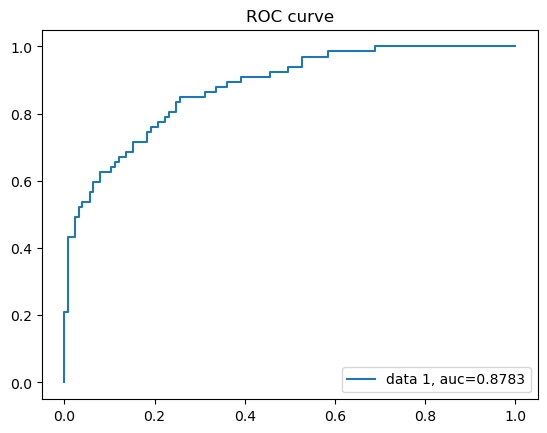

In [13]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(round(auc, 4)))
plt.legend(loc=4)
plt.title('ROC curve')
plt.show()

#### Advantages
Because of its efficient and straightforward nature, it doesn't require high computation power, is easy to implement, easily interpretable, and used widely by data analysts and scientists. Also, it doesn't require scaling of features. Logistic regression provides a probability score for observations.

#### Disadvantages
Logistic regression is not able to handle a large number of categorical features/variables. It is vulnerable to overfitting. Also, can't solve the non-linear problem with the logistic regression that is why it requires a transformation of non-linear features. Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.